### **Importing Required Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import tensorflow as tf
import glob

from skimage.io import imread, imshow

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import warnings
warnings.filterwarnings('ignore')


### **Load Data**

#### Training Data

In [5]:
# organic type
train_o = glob.glob('DATASET/TRAIN/O/*.jpg')

In [6]:
# recycle type
train_r = glob.glob('DATASET/TRAIN/R/*.jpg')

In [7]:
# Total training images 
print("Nos of training samples: {}".format(len(train_o)+len(train_r)))

Nos of training samples: 22564


### Let us view some of the images of **Organic** type

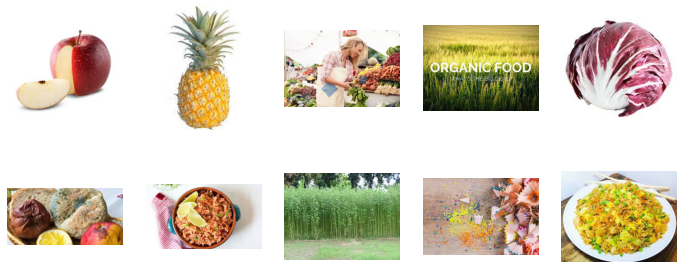

In [8]:
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread("DATASET/TRAIN/O/O_20.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("DATASET/TRAIN/O/O_25.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("DATASET/TRAIN/O/O_800.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("DATASET/TRAIN/O/O_1004.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("DATASET/TRAIN/O/O_1658.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("DATASET/TRAIN/O/O_6783.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("DATASET/TRAIN/O/O_11783.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("DATASET/TRAIN/O/O_8583.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("DATASET/TRAIN/O/O_9000.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("DATASET/TRAIN/O/O_12000.jpg")
plt.imshow(img)

### Let us view some of the images of **Recycle** type

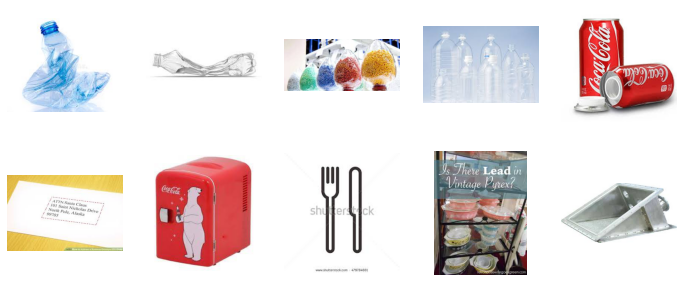

In [6]:
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread("DATASET/TRAIN/R/R_20.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("DATASET/TRAIN/R/R_25.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("DATASET/TRAIN/R/R_800.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("DATASET/TRAIN/R/R_1004.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("DATASET/TRAIN/R/R_1658.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("DATASET/TRAIN/R/R_6783.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("DATASET/TRAIN/R/R_1783.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("DATASET/TRAIN/R/R_8589.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("DATASET/TRAIN/R/R_9000.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("DATASET/TRAIN/R/R_5000.jpg")
plt.imshow(img)

### **Data Augmentation**

In [7]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   zoom_range = 0.4,
                                   rotation_range = 10,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1.0 / 255.0)

In [8]:
# --------------------
# Flow training images in batches of 64 using train_datagen generator
# --------------------
train_dataset  = train_datagen.flow_from_directory(directory = 'DATASET/TRAIN',
                                                   target_size = (224,224),
                                                   class_mode = 'binary',
                                                   batch_size = 64, 
                                                   subset = 'training')
# --------------------
# Flow validation images in batches of 64 using valid_datagen generator
# --------------------
validation_dataset = valid_datagen.flow_from_directory(directory = 'DATASET/TRAIN',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 64, 
                                                  subset = 'validation')

# Test Data 

test_dataset = test_datagen.flow_from_directory(directory = 'DATASET/TEST',
                                             target_size = (224,224),
                                             class_mode = 'binary',
                                             batch_size = 64)

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


### **Model Building**

#### Formation of CNN

In [9]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 224x224 with 3 color
    tf.keras.layers.Conv2D(filters=32,activation='relu',input_shape=(224,224,3),padding='same',kernel_size=(3,3)),
    tf.keras.layers.Conv2D(filters=32,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.Conv2D(filters=64,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.Conv2D(filters=128,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(units=512,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(units=256,activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Organic') 
    # and 1 for the other ('Recycled')
    tf.keras.layers.Dense(units=1,activation='sigmoid'),
])

In [10]:
#The following is the model summary of the model:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 128)       7

#### Specifying the optimizers and compile the model

In [11]:
monitor = EarlyStopping(monitor='val_auc', patience=2, 
                        verbose=1, mode='max',restore_best_weights=True)
# Defining Callbacks

filepath = './best_weights.hdf5'
checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_auc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [monitor, checkpoint]

# model compile
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = [tf.keras.metrics.AUC(name = 'auc')])

###  Model Fitting

In [12]:
history = model.fit(train_dataset,
                              validation_data=validation_dataset,
                              epochs=15,
                              verbose=1, callbacks=callback_list)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 283 steps, validate for 71 steps
Epoch 1/15
282/283 [============================>.] - ETA: 1s - loss: 0.6452 - auc: 0.7959
Epoch 00001: val_auc improved from -inf to 0.88842, saving model to ./best_weights.hdf5
283/283 [==============================] - 319s 1s/step - loss: 0.6443 - auc: 0.7963 - val_loss: 0.5980 - val_auc: 0.8884
Epoch 2/15
282/283 [============================>.] - ETA: 1s - loss: 0.4444 - auc: 0.8757
Epoch 00002: val_auc did not improve from 0.88842
283/283 [==============================] - 309s 1s/step - loss: 0.4441 - auc: 0.8758 - val_loss: 0.7596 - val_auc: 0.8816
Epoch 3/15
282/283 [============================>.] - ETA: 0s - loss: 0.4121 - auc: 0.8949
Epoch 00003: val_auc improved from 0.88842 to 0.90940, saving model to ./best_weights.hdf5
283/283 [==============================] - 269s 949ms/step - loss: 0.4123 - auc: 0.8948 - val_loss: 0.4145 - val_auc: 0.9094
Epoch 4/15
282/283 [================

### Model Evaluation

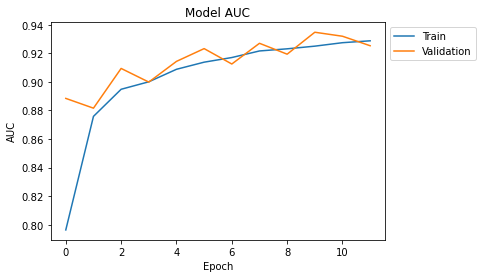

In [13]:
# plotting model auc

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

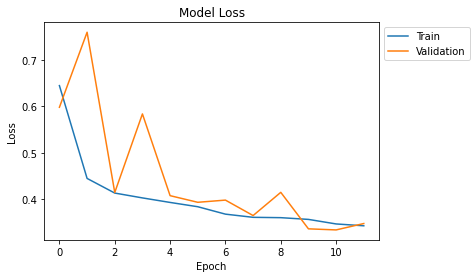

In [14]:
# plotting model loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [15]:
# Evaluating Loss and AUC for Test data 

model.evaluate(test_dataset)

  ...
    to  
  ['...']
40/40 [==============================] - 8s 188ms/step - loss: 0.2951 - auc: 0.9504


[0.2951466176658869, 0.95040953]

The image belongs to Organic waste category 


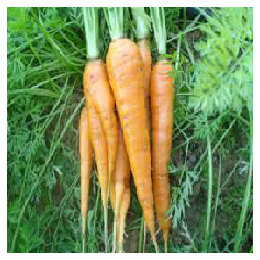

In [17]:
# Test - ORGANIC

test_dict = test_dataset.class_indices
idc = {k:v for v,k in test_dict.items()}

img = load_img('DATASET/TEST/O/O_12596.jpg', target_size=(224,224))
img = img_to_array(img)
img = img / 255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
pred = model.predict_proba(img)

if pred[0][0] > 0.5:
    print("The image belongs to Recycle waste category")
else:
    print("The image belongs to Organic waste category ")

ERROR! Session/line number was not unique in database. History logging moved to new session 606
The image belongs to Recycle waste category


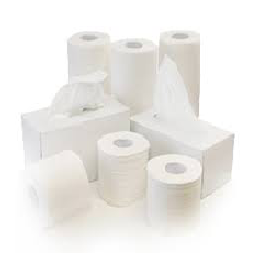

In [18]:
# Test - RECYCLE

test_dict = test_dataset.class_indices
idc = {k:v for v,k in test_dict.items()}

img = load_img('DATASET/TEST/R/R_10762.jpg', target_size=(224,224))
img = img_to_array(img)
img = img / 255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
pred = model.predict_proba(img)

if pred[0][0] > 0.5:
    print("The image belongs to Recycle waste category")
else:
    print("The image belongs to Organic waste category ")

### Conclusion - 

1. We were able to classify images properly having accuracy of 92.87% in training dataset.

2. We achieved an accuracy of 92.63% on validation data and 95% accuracy on test accuracy.